## Squad: Mae C. Jemison

Integrantes:
*   Amparo Silvia Pastor Castillo Runschka
*   Cristiana Alves Moura
*   Fernanda Monello Correa Manoel
*   Larissa Monique de Sousa Rodrigues
*   Raquel Nunes Matos Rios
*   Vanelle Rabelo do Nascimento
*   Vanessa Lima Paraizo
*   Verônica Lima Costa


## Desafio 1: Entendendo o consumidor.
Suponha que você trabalha em uma empresa de streaming e, com as
mudanças no mercado, a equipe de marketing suspeita que o perfil dos
clientes que cancelaram a assinatura mudou. Eles pediram sua ajuda para
entender:

1.   Se o perfil dos clientes que cancelam hoje é diferente do perfil dos clientes que cancelaram anteriormente.
Dica: Fazer um comparativo dos clientes que cancelaram nos últimos 6
meses com os que cancelaram a mais de 24 meses.
2.   Quais são as principais diferenças entre os perfis, para que possam criar
estratégias mais eficazes de retenção.
Para isso, eles fornecem a base de dados clientes.csv, que contém
informações anonimizadas sobre os clientes ao longo do tempo.


## Etapa de ETL - Extração, Transformação e Limpeza dos dados

###Importações e inserção do dataset:

[Data Set Clientes](https://docs.google.com/spreadsheets/d/12umlCuYSIC4gSiBwqn1JSI1Ey3I56yKHkc4Ni8bE3yg/edit?gid=1990017453#gid=1990017453)

[Canva da Apresentação](https://www.canva.com/design/DAGigNR1b2Q/rpeGuN1A2kFYUnMU9NP8Mg/edit)


In [7]:
# Importando todas as bibliotecas utilizadas no desafio:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística e testes de hipóteses
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Cálculo de tamanho amostral
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_confint

# Configuração para melhor visualização dos gráficos
sns.set_theme(style="whitegrid")
plt.style.use("ggplot")

url = 'https://docs.google.com/spreadsheets/d/12umlCuYSIC4gSiBwqn1JSI1Ey3I56yKHkc4Ni8bE3yg/edit?gid=1990017453#gid=1990017453'
url = url.replace('/edit?gid=', '/export?format=csv&gid=')
df = pd.read_csv(url)

# Remover colunas desnecessárias
df = df.drop(columns=['cliente_id'])  # Exclui a coluna 'cliente_id', pois não é relevante para a análise

# Criar categorias de idade
#bins = [18, 30, 45, 60, 80]  # Define os intervalos das faixas etárias
#labels = ['18-29', '30-44', '45-59', '60+']  # Define os rótulos correspondentes para cada faixa etária
#df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False)# A função `pd.cut` categoriza a idade dos clientes com base nos intervalos definidos

# Criar métrica de engajamento
df['engajamento'] = df['frequencia_uso_mensal'] / df['tempo_assinatura_meses'] # Calcula o nível de engajamento do cliente, dividindo a frequência de uso mensal pelo tempo total de assinatura
# Quanto maior o valor, maior o engajamento do usuário com o serviço ao longo do tempo

# Converter a coluna 'cancelou' para tipo booleano (1 = cancelado, 0 = ativo)
df['cancelou'] = df['cancelou'].map({0: 1, 1: 0}).astype(int) # Agora 0 significa "Cancelado" e 1 significa "Ativo"

# Verificar as transformações
print(df.head(10))

# Salvar o dataset transformado
#df.to_csv('dados_transformados.csv', index=False)# Salva o DataFrame transformado em um arquivo CSV, sem incluir o índice, para análise posterior


   idade  tempo_assinatura_meses  frequencia_uso_mensal        regiao  \
0     56                      30                     27  Centro-Oeste   
1     69                      11                      2         Norte   
2     46                      58                     21           Sul   
3     32                      55                      1         Norte   
4     60                      28                     28           Sul   
5     25                      25                     15           Sul   
6     38                      39                      1      Nordeste   
7     56                      33                      5           Sul   
8     36                       1                     28       Sudeste   
9     40                      57                     29  Centro-Oeste   

   mensalidade  cancelou  engajamento  
0        96.03         0     0.900000  
1        91.22         1     0.181818  
2        56.45         1     0.362069  
3        69.61         1     0.01818

### Etapa 1: Análise de Distribuição e Perfis


* Analisar a distribuição de idade, tempo de assinatura, frequência de uso e região dos clientes que cancelaram nos últimos 6 meses e dos que cancelaram há mais de 24 meses.
*  Identificar e descrever as principais diferenças entre os perfis dos clientes nesses dois períodos.

In [8]:
df.head()

,idade,tempo_assinatura_meses,frequencia_uso_mensal,regiao,mensalidade,cancelou,engajamento
0,56,30,27,Centro-Oeste,96.03,0,0.900000
1,69,11,2,Norte,91.22,1,0.181818
2,46,58,21,Sul,56.45,1,0.362069
3,32,55,1,Norte,69.61,1,0.018182
4,60,28,28,Sul,42.19,1,1.000000


In [18]:
df.describe()

,idade,tempo_assinatura_meses,frequencia_uso_mensal,mensalidade,cancelou,engajamento
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,45.260000,30.890000,15.980000,59.129000,0.720000,1.468962
std,16.040852,17.679102,8.843679,23.318007,0.450126,3.334244
min,18.000000,1.000000,1.000000,21.160000,0.000000,0.018182
25%,31.750000,16.750000,8.000000,38.807500,0.000000,0.256944
50%,45.000000,32.000000,17.000000,57.710000,1.000000,0.500000
75%,59.000000,48.000000,23.000000,79.680000,1.000000,1.168478
max,74.000000,59.000000,29.000000,99.980000,1.000000,28.000000


In [19]:
#fazer uma copia da base de dados com clientes que cancelaram nos ultimos 6 meses, e deixando só as columnas que precisamos analisar
df_menor_6 = df[(df['tempo_assinatura_meses'] <= 6) & (df['cancelou'] == 1)].drop(columns=['mensalidade', 'cancelou','engajamento'])

df_menor_6.head(5)
df_menor_6.describe()

,idade,tempo_assinatura_meses,frequencia_uso_mensal
count,15.000000,15.000000,15.000000
mean,49.933333,3.133333,18.866667
std,16.485780,1.726543,6.151268
min,25.000000,1.000000,7.000000
25%,35.500000,2.000000,15.500000
50%,54.000000,3.000000,19.000000
75%,64.000000,4.500000,23.000000
max,72.000000,6.000000,28.000000


<Figure size 800x1000 with 0 Axes>

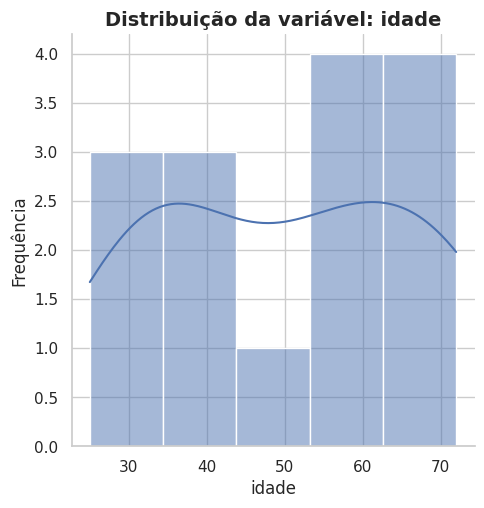

<Figure size 800x1000 with 0 Axes>

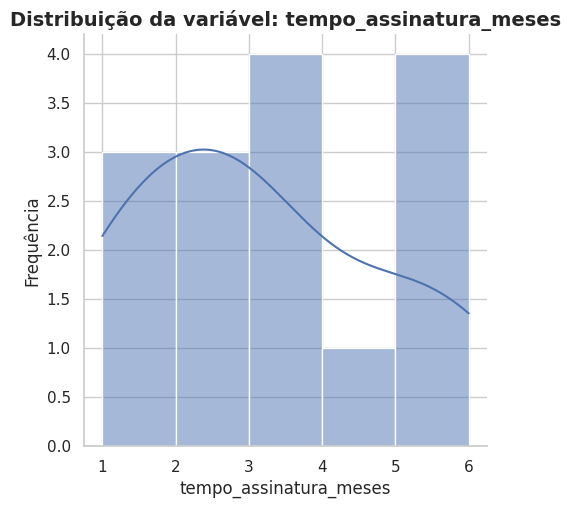

<Figure size 800x1000 with 0 Axes>

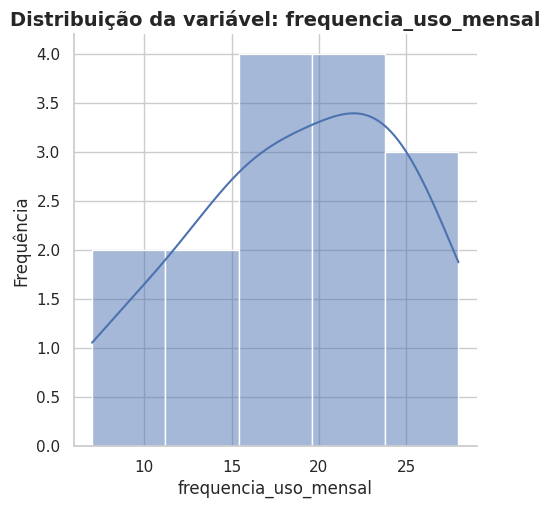

<Figure size 800x1000 with 0 Axes>

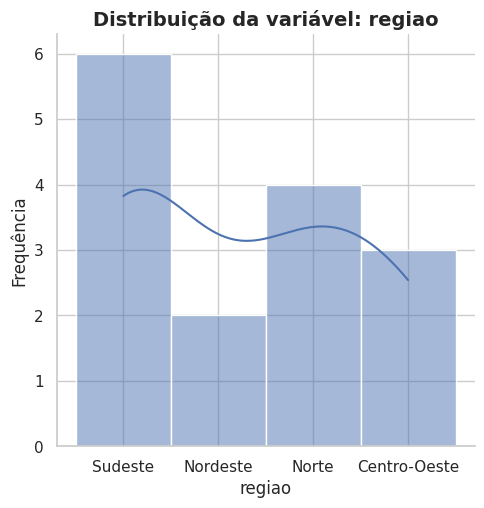

In [21]:
#criar histograma para cada columna para ver a distribuição
# create distplots
for column in df_menor_6.columns:
    plt.figure()
    sns.displot(data = df_menor_6 , x = column, kde= True)


# Melhorando os detalhes visuais
    plt.title(f"Distribuição da variável: {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequência", fontsize=12)

    # Mostra o gráfico
    plt.show()

In [22]:
#fazer uma copia da base de dados com clientes que cancelaram com mais de 2 anos de assinatura, e deixando só as columnas que precisamos analisar
df_maior_24 = df[(df['tempo_assinatura_meses'] > 24) & (df['cancelou'] == 1)].drop(columns=['mensalidade', 'cancelou','engajamento'])

df_maior_24.head(5)
df_maior_24.describe()

,idade,tempo_assinatura_meses,frequencia_uso_mensal
count,92.000000,92.00000,92.000000
mean,44.097826,42.25000,14.934783
std,15.790566,10.32933,9.095107
min,18.000000,25.00000,1.000000
25%,31.000000,33.00000,6.750000
50%,43.000000,41.00000,16.000000
75%,57.500000,52.00000,22.000000
max,74.000000,59.00000,29.000000


<Figure size 800x1000 with 0 Axes>

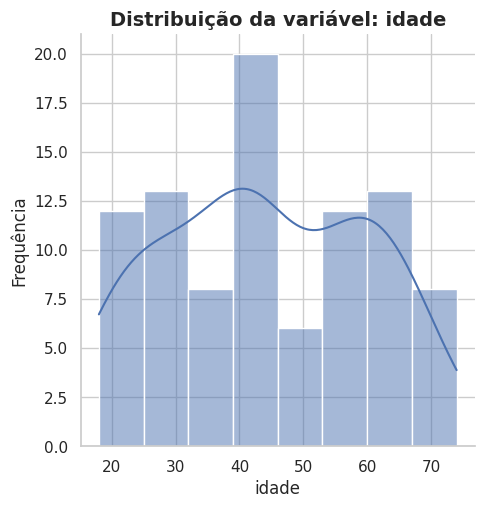

<Figure size 800x1000 with 0 Axes>

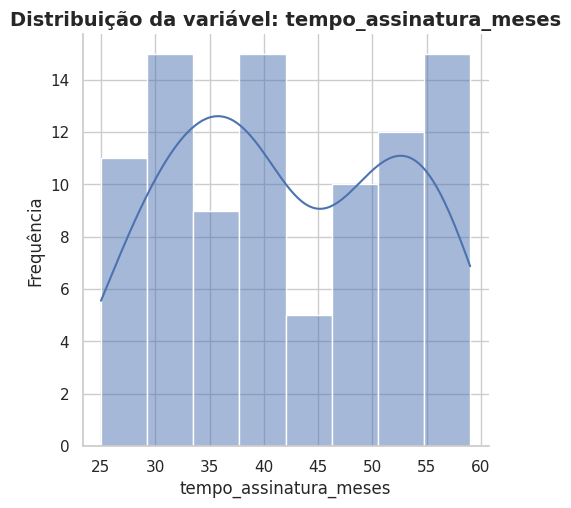

<Figure size 800x1000 with 0 Axes>

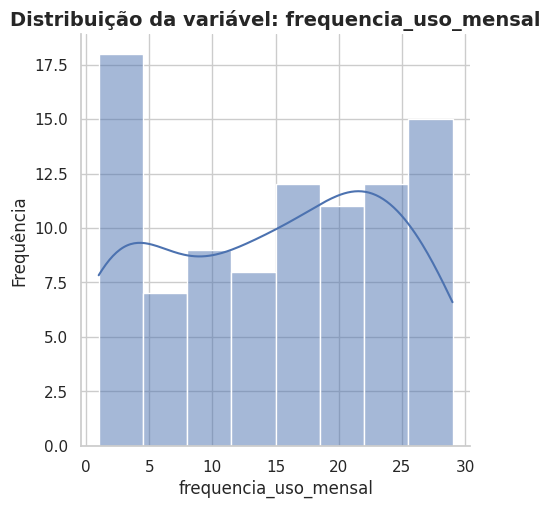

In [23]:
#criar histograma para cada columna para ver a distribuição

# create distplots
for column in df_maior_24.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.displot(data = df_maior_24 , x = column, kde= True)


# Melhorando os detalhes visuais
    plt.title(f"Distribuição da variável: {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequência", fontsize=12)

    # Mostra o gráfico
    plt.show()

### Etapa 2: Visualização de Dados

*   Criar gráficos para visualizar padrões dos clientes que mantêm e cancelam a assinatura (histogramas, boxplots, gráficos de dispersão).
*   Destacar insights visuais e possíveis tendências nos dados analisados.



In [ ]:
# Implementação do código referente à etapa 2:

### Etapa 3: Análise de Distribuição e Perfis


* Aplicar testes estatísticos (ex.: teste qui-quadrado, teste t, regressão logística) para verificar se há relação significativa entre o tempo de assinatura e a taxa de cancelamento.
* Interpretar os resultados e explicar o impacto desses achados na retenção de clientes.

In [ ]:
# Implementação do código referente à etapa 3:

### Etapa 4: Análise de Distribuição e Perfis


* Calcular o tamanho da amostra necessária para obter conclusões com 95% de confiança e 2% de margem de erro. Verificar se a base informada é suficiente.
*  Repetir o cálculo para uma margem de erro de 10% e comparar os resultados com a amostra disponível.

In [ ]:
# Implementação do código referente à etapa 4: